In [1]:
import os
import numpy as np
import pandas as pd

from interstellar import Tracks

In [2]:
seed = 101
path = '/rds/projects/d/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex100'

tracks = Tracks(path=path, name='test_stars')

In [3]:
tracks.compile_metadata()
tracks.get_metadata()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.96548,0.27685,0.04043,1.85611,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.95309,0.27195,0.00710,1.91350,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.00004,0.28872,0.29397,2.04466,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.14261,0.27603,-0.02713,2.18964,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.90457,0.28077,0.13303,2.00033,0.0,1
...,...,...,...,...,...,...,...
95,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.09238,0.29178,0.25319,2.04822,0.0,1
96,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.90348,0.27679,0.06096,2.00044,0.0,1
97,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.99345,0.26667,0.04253,1.91546,0.0,1
98,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.91971,0.27831,0.09672,2.04544,0.0,1


In [4]:
from interstellar.tracks import DATA_COLS

print(DATA_COLS)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit']


In [5]:
cols = DATA_COLS + ['surface_he4', 'surface_Z', 'initial_Zinit']
print(cols)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit', 'surface_he4', 'surface_Z', 'initial_Zinit']


In [6]:
tracks.compile_data(usecols=cols)
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
0,0,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.000130,0.000015,4410.410861,7.620105,4.734577,3.072070,0.276807,0.014085,0.040381,11.974618
1,0,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.000136,0.000015,4413.321484,7.395720,4.658198,3.086197,0.276807,0.014085,0.040390,12.276664
2,0,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.000140,0.000016,4415.321281,7.225692,4.600170,3.097085,0.276809,0.014086,0.040406,12.514915
3,0,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.000144,0.000016,4416.817866,7.095867,4.555569,3.105547,0.276810,0.014086,0.040421,12.703270
4,0,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.000147,0.000017,4417.925026,6.995561,4.520989,3.112166,0.276812,0.014087,0.040438,12.852601


Select main sequence.

In [7]:
condition = tracks.get_data('frac_age') > 0.01
tracks.select_data(condition).head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
426,1,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.098626,0.011099,5621.123610,0.686437,0.874808,4.538807,0.276273,0.014066,0.039470,162.572925
427,1,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.111370,0.012533,5622.235071,0.688164,0.875562,4.538059,0.276179,0.014062,0.039283,162.364895
428,1,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.126661,0.014254,5623.169997,0.689837,0.876334,4.537293,0.276066,0.014057,0.039059,162.152912
429,1,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.145012,0.016319,5623.977848,0.691502,0.877139,4.536496,0.275929,0.014051,0.038785,161.932933
430,1,0.96548,0.27685,0.014086,0.04043,1.85611,0.96548,0.167032,0.018797,5624.731344,0.693222,0.877994,4.535650,0.275765,0.014044,0.038458,161.700124


In [8]:
tracks.select_data(condition, inplace=True)

In [9]:
def frac_evol(track):
    return 1.0 + (track['star_age'] - track['star_age'].min()) / \
           (track['star_age'].max() - track['star_age'].min())

In [10]:
tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_evol'] = tracks._data.loc[tracks._data.frac_age<=1.0, 'frac_age']

In [11]:
grouped = tracks._data.groupby(by=['initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit'])

for name, group in grouped:
    cond = group.frac_age>1.0
    tracks._data.loc[group[cond].index, 'frac_evol'] = frac_evol(group.loc[cond])

Now we will group by individual track and randomly select a point.

In [12]:
from scipy import stats

In [13]:
mean_age = 7.0
std_age = 2.

In [14]:
tracks._data['age_weights'] = stats.norm.pdf(tracks._data['star_age'], mean_age, std_age)
tracks._data['age_weights'].head()

426    0.000518
427    0.000529
428    0.000544
429    0.000561
430    0.000582
Name: age_weights, dtype: float64

In [15]:
test_stars = pd.DataFrame(columns=tracks._data.columns)
test_stars

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights


In [24]:
np.random.seed(seed)

In [25]:
grouped = tracks._data.groupby(by=['initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit'])

for i, (name, group) in enumerate(grouped):
    cond = group.star_age < 14.  # Less than age of the universe
    test_stars.loc[i] = group.loc[cond].sample(n=1, weights='age_weights').to_numpy()[0]

In [26]:
test_stars.head()

,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights
0,1.0,0.85397,0.25364,0.014426,0.03700,2.00798,0.85397,7.046015,0.398266,5200.535430,0.445522,0.823374,4.538138,0.228446,0.013172,-0.017916,167.944271,0.398266,0.199418
1,1.0,0.85854,0.27288,0.017527,0.13517,1.84533,0.85854,7.349840,0.435597,5169.130768,0.460919,0.847689,4.515177,0.244816,0.015969,0.076846,161.360379,0.435597,0.196443
2,1.0,0.86302,0.29363,0.028322,0.36335,1.99334,0.86302,3.216747,0.174959,4893.183014,0.323551,0.792587,4.575816,0.282007,0.027385,0.340614,178.462162,0.174959,0.033333
3,1.0,0.86445,0.27088,0.012056,-0.03175,1.89884,0.86445,5.086326,0.372984,5427.143855,0.555922,0.844546,4.521383,0.246552,0.011104,-0.082774,162.451236,0.372984,0.126204
4,1.0,0.86455,0.28837,0.018435,0.16724,1.90678,0.86455,7.930125,0.528107,5297.480060,0.542283,0.875454,4.490213,0.255423,0.016633,0.101207,154.279390,0.528107,0.179025


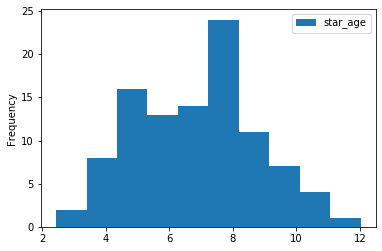

In [27]:
%matplotlib inline
test_stars.plot(kind='hist', y='star_age')

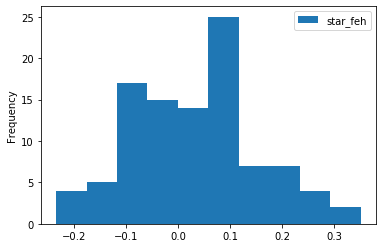

In [28]:
test_stars.plot(kind='hist', y='star_feh')

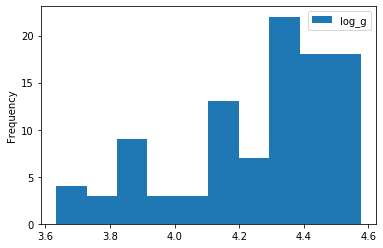

In [29]:
test_stars.plot(kind='hist', y='log_g')

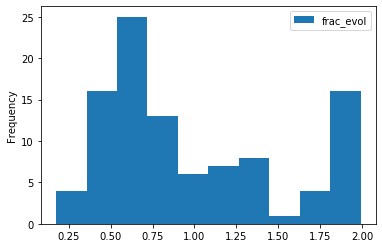

In [30]:
test_stars.plot(kind='hist', y='frac_evol')

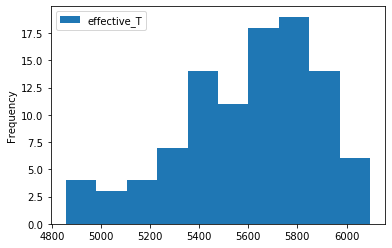

In [31]:
test_stars.plot(kind='hist', y='effective_T')

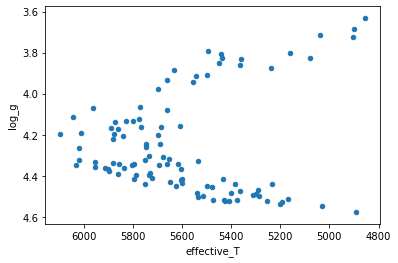

In [32]:
ax = test_stars.plot(kind='scatter', x='effective_T', y='log_g')
ax.invert_xaxis()
ax.invert_yaxis()

In [33]:
save_path = '../data/tracks/test_stars'

if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [34]:
test_stars.to_csv(os.path.join(save_path, 'test_stars_outputs.csv'), index_label='index')